📊 Unemployment Analysis - Task 2
✅ Loaded ../data/Unemployment in India.csv with shape (740, 7)
✅ Loaded ../data/Unemployment_Rate_upto_11_2020.csv with shape (267, 9)
✅ Combined dataset shape: (1007, 10)
✅ Date range: 2019-05-31 to 2020-10-31

📋 Dataset Overview:
Total records: 1,007
Date range: 2019-05-31 to 2020-10-31
Regions: 28
Areas: 2

🔍 Missing values:
Area: 267 (26.5%)
Region.1: 740 (73.5%)
longitude: 740 (73.5%)
latitude: 740 (73.5%)

📄 First 5 rows:


,Region,Date,Frequency,UnemploymentRate,Estimated Employed,Estimated Labour Participation Rate (%),Area,Region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Maharashtra,2019-05-31,Monthly,6.08,16962574.0,38.30,Urban,NaN,NaN,NaN
2,Jharkhand,2019-05-31,Monthly,17.23,2404033.0,43.25,Urban,NaN,NaN,NaN
3,Jammu & Kashmir,2019-05-31,Monthly,23.04,1130139.0,46.74,Urban,NaN,NaN,NaN
4,Himachal Pradesh,2019-05-31,Monthly,10.88,245668.0,45.27,Urban,NaN,NaN,NaN



📊 Exploratory Data Analysis

📈 Statistical Summary:


,UnemploymentRate,Estimated Employed,Estimated Labour Participation Rate (%)
count,1007.000000,1.007000e+03,1007.000000
mean,11.906991,8.996209e+06,42.378620
std,10.739549,1.020784e+07,8.048542
min,0.000000,4.942000e+04,13.330000
25%,4.685000,1.639125e+06,37.835000
50%,8.890000,5.543380e+06,40.880000
75%,16.125000,1.287115e+07,45.315000
max,76.740000,5.943376e+07,72.570000



🔍 Duplicate records: 0

🇮🇳 National Trend Analysis

📅 Yearly Analysis:


,Avg_Rate,Std_Rate,Min_Rate,Max_Rate,Avg_Employed,Avg_Participation
Year,,,,,,
2019,9.40,7.22,0.0,34.69,7422976.47,43.89
2020,13.78,12.43,0.0,76.74,10168635.64,41.26



📊 Data Visualizations



📅 Monthly Pattern Analysis


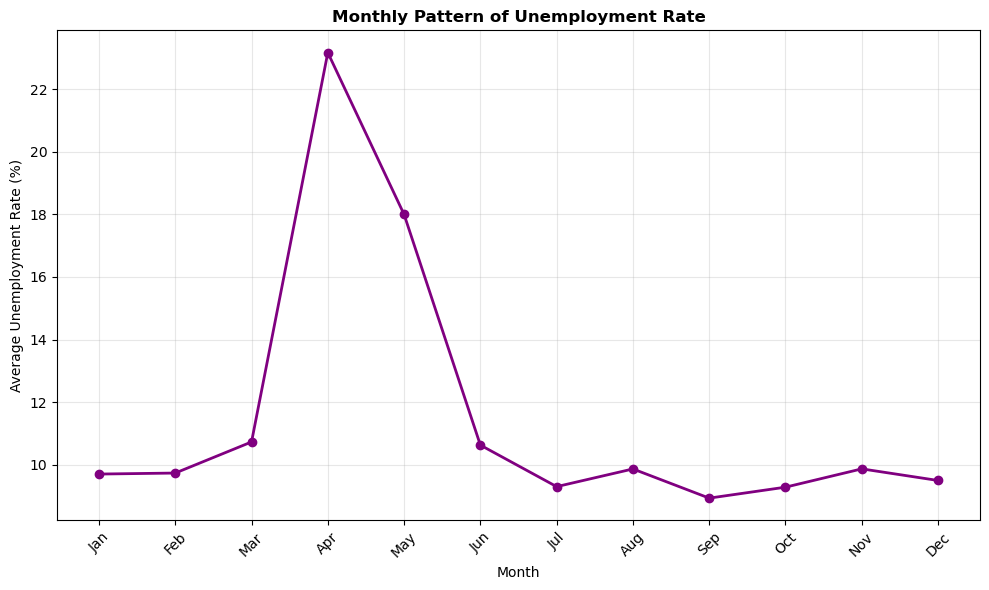


💡 Key Insights
📈 Current Unemployment Rate: 8.0%
📊 Average Rate (Overall): 11.2%
⬆️  Highest Recorded Rate: 24.3%
⬇️  Lowest Recorded Rate: 8.0%
📅 Data covers 2 years
🏆 Region with highest unemployment: Tripura
🎯 Region with lowest unemployment: Meghalaya

🔍 Data Quality Assessment
📊 Potential outliers in Unemployment Rate: 45 (4.5%)

🔎 Sample outliers:


,Region,Date,UnemploymentRate
44,Tripura,2019-05-31,34.69
183,Tripura,2019-08-31,33.45
228,Tripura,2019-09-30,33.57
420,Tripura,2019-12-31,33.48
496,Tripura,2020-01-31,34.37



✅ Analysis completed successfully!


In [1]:
# 📊 Unemployment Analysis  
# Professional notebook prepared for CodeAlpha Internship  
# **Author:** José Antônio Afonso (Afonso)  
# **Date:** 2025-11-01 01:33 UTC

# ---

# 1️⃣ Imports and settings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

print("📊 Unemployment Analysis - Task 2")
print("=" * 50)

# 2️⃣ Load and Clean Data
def load_and_clean(path):
    """Load and clean unemployment dataset"""
    try:
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()
        
        # Detect and convert date column
        date_col = 'Date'
        if date_col not in df.columns:
            for c in df.columns:
                if 'date' in c.lower():
                    date_col = c
                    break
        
        # Convert date with proper error handling
        df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
        df = df.dropna(subset=[date_col])
        
        # Detect unemployment column
        possible_cols = [c for c in df.columns if 'unemployment' in c.lower() or 'rate' in c.lower()]
        rate_col = possible_cols[0] if possible_cols else df.columns[-1]
        
        # Clean and convert unemployment rate
        df[rate_col] = (df[rate_col].astype(str)
                        .str.replace('%', '', regex=False)
                        .str.replace(',', '.', regex=False)
                        .astype(float))
        
        df = df.rename(columns={rate_col: 'UnemploymentRate', date_col: 'Date'})
        df = df.sort_values('Date').reset_index(drop=True)
        return df
        
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

def load_and_process_data():
    """Load and combine all unemployment datasets"""
    paths = [
        "../data/Unemployment in India.csv",
        "../data/Unemployment_Rate_upto_11_2020.csv"
    ]
    
    dfs = []
    for p in paths:
        try:
            d = load_and_clean(p)
            if d is not None:
                print(f"✅ Loaded {p} with shape {d.shape}")
                dfs.append(d)
            else:
                print(f"❌ Failed to load {p}")
        except Exception as e:
            print(f"❌ Error loading {p}: {e}")
    
    if not dfs:
        raise ValueError("No datasets were successfully loaded")
    
    # Combine datasets
    df = pd.concat(dfs, ignore_index=True).sort_values('Date').reset_index(drop=True)
    
    # Data quality checks
    print(f"✅ Combined dataset shape: {df.shape}")
    print(f"✅ Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
    
    return df

# Load the data
df = load_and_process_data()

# Display basic info
print("\n📋 Dataset Overview:")
print("=" * 40)
print(f"Total records: {len(df):,}")
print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"Regions: {df['Region'].nunique()}")
print(f"Areas: {df['Area'].nunique() if 'Area' in df.columns else 'N/A'}")

print("\n🔍 Missing values:")
print("=" * 40)
missing_data = df.isnull().sum()
for col, missing in missing_data.items():
    if missing > 0:
        print(f"{col}: {missing} ({missing/len(df)*100:.1f}%)")

# Display first few rows
print("\n📄 First 5 rows:")
print("=" * 40)
display(df.head())

# 3️⃣ Exploratory Data Analysis
print("\n📊 Exploratory Data Analysis")
print("=" * 50)

# Basic statistics
print("\n📈 Statistical Summary:")
print("=" * 40)
numeric_cols = ['UnemploymentRate', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
display(df[numeric_cols].describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate records: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicates")

# 4️⃣ National Trend and Yearly Analysis
print("\n🇮🇳 National Trend Analysis")
print("=" * 50)

# Create a copy for analysis
analysis_df = df.copy()

# Extract year and month for time series analysis
analysis_df['Year'] = analysis_df['Date'].dt.year
analysis_df['Month'] = analysis_df['Date'].dt.month
analysis_df['YearMonth'] = analysis_df['Date'].dt.to_period('M')

# National unemployment trend
national_trend = analysis_df.groupby('Date')['UnemploymentRate'].mean().reset_index()

print("\n📅 Yearly Analysis:")
print("=" * 40)
yearly_stats = analysis_df.groupby('Year').agg({
    'UnemploymentRate': ['mean', 'std', 'min', 'max'],
    'Estimated Employed': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean'
}).round(2)

yearly_stats.columns = ['Avg_Rate', 'Std_Rate', 'Min_Rate', 'Max_Rate', 'Avg_Employed', 'Avg_Participation']
display(yearly_stats)

# 5️⃣ Visualization
print("\n📊 Data Visualizations")
print("=" * 50)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Unemployment Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Unemployment Rate Over Time
axes[0, 0].plot(national_trend['Date'], national_trend['UnemploymentRate'], 
                color='teal', linewidth=2, marker='o', markersize=3)
axes[0, 0].set_title('National Unemployment Rate Trend', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Unemployment Rate (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Yearly Average Unemployment Rate
yearly_avg = analysis_df.groupby('Year')['UnemploymentRate'].mean()
axes[0, 1].bar(yearly_avg.index, yearly_avg.values, color='skyblue', alpha=0.7)
axes[0, 1].set_title('Average Unemployment Rate by Year', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Unemployment Rate (%)')
axes[0, 1].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(yearly_avg.values):
    axes[0, 1].text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 3: Regional Analysis (Top 10 regions by average unemployment)
if 'Region' in df.columns:
    regional_avg = analysis_df.groupby('Region')['UnemploymentRate'].mean().sort_values(ascending=False).head(10)
    axes[1, 0].barh(range(len(regional_avg)), regional_avg.values, color='lightcoral', alpha=0.7)
    axes[1, 0].set_yticks(range(len(regional_avg)))
    axes[1, 0].set_yticklabels(regional_avg.index)
    axes[1, 0].set_title('Top 10 Regions by Average Unemployment Rate', fontweight='bold')
    axes[1, 0].set_xlabel('Average Unemployment Rate (%)')
    
    # Add value labels
    for i, v in enumerate(regional_avg.values):
        axes[1, 0].text(v + 0.1, i, f'{v:.1f}%', va='center')

# Plot 4: Area-wise comparison (if available)
if 'Area' in df.columns and df['Area'].notna().sum() > 0:
    area_avg = analysis_df.groupby('Area')['UnemploymentRate'].mean()
    axes[1, 1].bar(area_avg.index, area_avg.values, color=['lightgreen', 'lightblue'], alpha=0.7)
    axes[1, 1].set_title('Average Unemployment Rate by Area', fontweight='bold')
    axes[1, 1].set_xlabel('Area')
    axes[1, 1].set_ylabel('Average Unemployment Rate (%)')
    
    # Add value labels
    for i, v in enumerate(area_avg.values):
        axes[1, 1].text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6️⃣ Additional Analysis: Monthly Patterns
print("\n📅 Monthly Pattern Analysis")
print("=" * 50)

monthly_pattern = analysis_df.groupby('Month')['UnemploymentRate'].mean()

plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_pattern.values, marker='o', linewidth=2, color='purple')
plt.title('Monthly Pattern of Unemployment Rate', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7️⃣ Key Insights
print("\n💡 Key Insights")
print("=" * 50)

# Calculate key metrics
current_rate = national_trend['UnemploymentRate'].iloc[-1]
max_rate = national_trend['UnemploymentRate'].max()
min_rate = national_trend['UnemploymentRate'].min()
avg_rate = national_trend['UnemploymentRate'].mean()

print(f"📈 Current Unemployment Rate: {current_rate:.1f}%")
print(f"📊 Average Rate (Overall): {avg_rate:.1f}%")
print(f"⬆️  Highest Recorded Rate: {max_rate:.1f}%")
print(f"⬇️  Lowest Recorded Rate: {min_rate:.1f}%")
print(f"📅 Data covers {len(analysis_df['Year'].unique())} years")

if 'Region' in df.columns:
    highest_region = analysis_df.groupby('Region')['UnemploymentRate'].mean().idxmax()
    lowest_region = analysis_df.groupby('Region')['UnemploymentRate'].mean().idxmin()
    print(f"🏆 Region with highest unemployment: {highest_region}")
    print(f"🎯 Region with lowest unemployment: {lowest_region}")

# 8️⃣ Data Quality Assessment
print("\n🔍 Data Quality Assessment")
print("=" * 50)

# Check for outliers in unemployment rate
Q1 = df['UnemploymentRate'].quantile(0.25)
Q3 = df['UnemploymentRate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['UnemploymentRate'] < lower_bound) | (df['UnemploymentRate'] > upper_bound)]
print(f"📊 Potential outliers in Unemployment Rate: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

if len(outliers) > 0:
    print("\n🔎 Sample outliers:")
    display(outliers[['Region', 'Date', 'UnemploymentRate']].head())

print("\n✅ Analysis completed successfully!")
print("=" * 50)